In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
def standardization(variable):
    """
    :param variable: the array with the variables you wish to standardize
    :return: standardized array
    """
    var_average = np.average(variable)
    var_std     = np.std(variable)
    new_variable = []
    for i in range(variable.size):
        new_variable_i = (variable[i] - var_average)/var_std
        new_variable.append(new_variable_i)
    new_variable = np.array(new_variable)
    return var_average, var_std, new_variable

In [3]:
clusters_path = './clusters'
tracks_path   = './tracks'

In [4]:
clusters = []
for i in range(5):
    if i==0:
        continue
    cluster_name = 'cluster_0'+str(i)+'.dat'
    clusters.append(cluster_name)
clusters = np.array(clusters)
print clusters

['cluster_01.dat' 'cluster_02.dat' 'cluster_03.dat' 'cluster_04.dat']


In [5]:
cluster01 = clusters[0]
cluster02 = clusters[1]
cluster03 = clusters[2]
cluster04 = clusters[3]

print cluster01, cluster02, cluster03, cluster04

cluster_01.dat cluster_02.dat cluster_03.dat cluster_04.dat


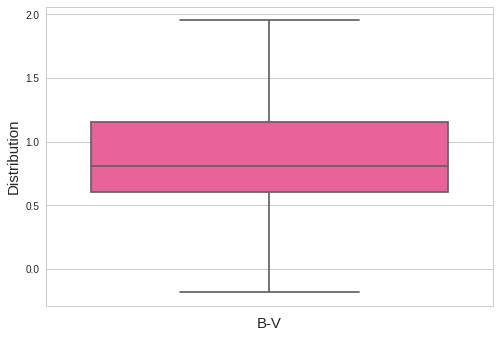

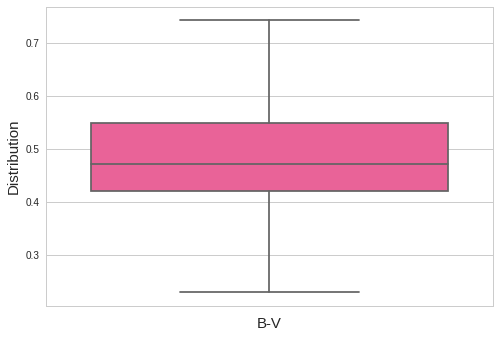

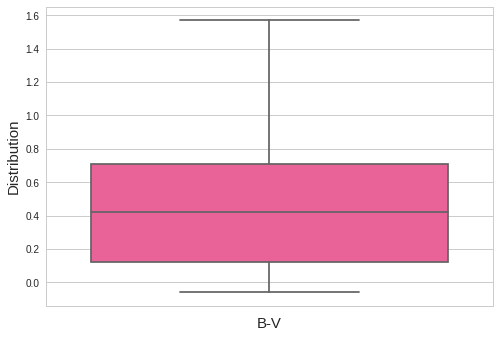

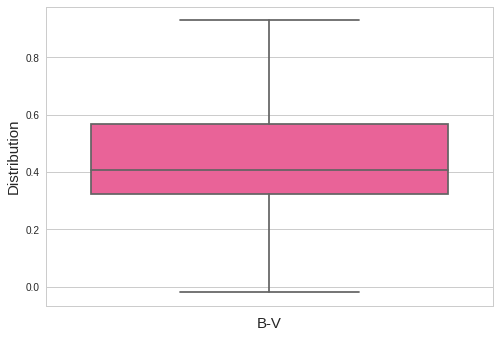

In [6]:
for i in range(clusters.size):
    cluster  = np.loadtxt(os.path.join(clusters_path, clusters[i]), dtype=float)
    v_band   = cluster[:,0].astype(float)
    bv_color = cluster[:,1].astype(float)
    
    my_palette = ['#ff4d94']
    sns.set_style("whitegrid")
    sns.boxplot(y=bv_color, palette=my_palette, showfliers=False)
    plt.ylabel('Distribution', fontsize=15)
    plt.xlabel('B-V', fontsize=15)
    plt.show()

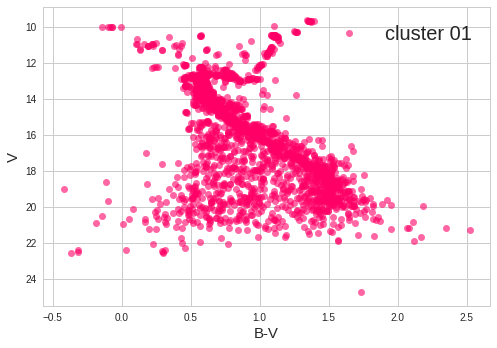

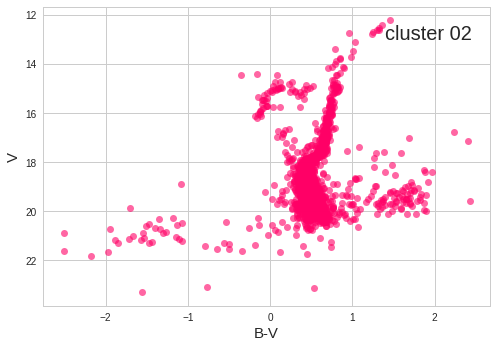

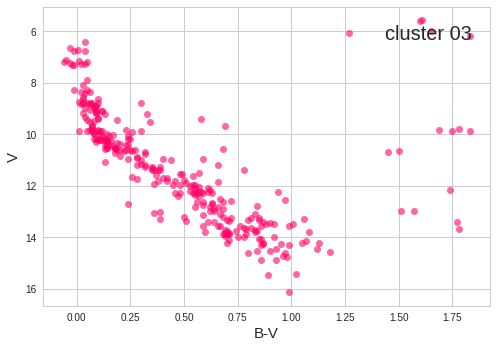

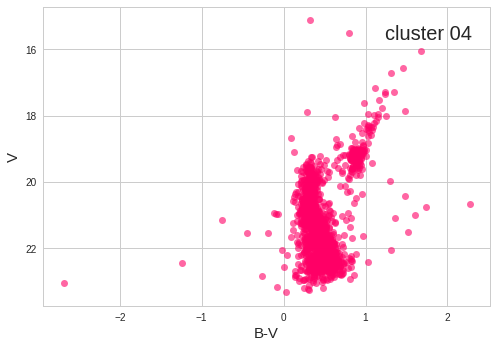

In [7]:
for i in range(clusters.size):
    cluster  = np.loadtxt(os.path.join(clusters_path, clusters[i]), dtype=float)
    v_band   = cluster[:,0].astype(float)
    bv_color = cluster[:,1].astype(float)
    
    index = [(v_band<26) * (bv_color>-5)]
              
    plt.plot(bv_color[index], v_band[index], 'o', color='#ff0066', alpha=0.6, label='cluster %s' % clusters[i][8:10])
    plt.ylabel('V', fontsize=15)
    plt.xlabel('B-V', fontsize=15)
    plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
    plt.gca().invert_yaxis()
    plt.minorticks_on()
    plt.show()

In [8]:
evolutionary_tracks_files = ['a7_z0001.dat', 'a7_z001.dat', 'a7_z015.dat', 'a7_z01.dat', 'a8_z0001.dat',
                             'a8_z001.dat', 'a8_z015.dat', 'a8_z01.dat', 'a9_z0001.dat', 'a9_z001.dat', 
                             'a9_z015.dat', 'a9_z01.dat', 'a5e9_z0001.dat', 'a5e9_z001.dat', 
                             'a5e9_z015.dat', 'a5e9_z01.dat', 'a13e9_z0001.dat', 'a13e9_z001.dat',
                             'a13e9_z015.dat', 'a13e9_z01.dat']

In [9]:
print len(evolutionary_tracks_files)

20


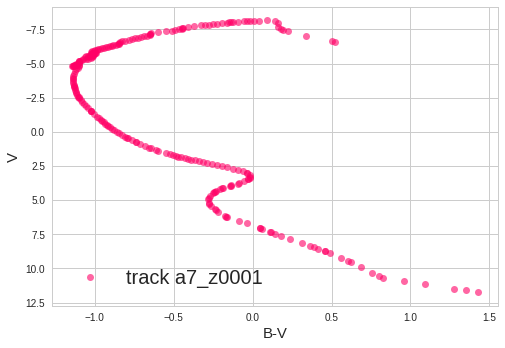

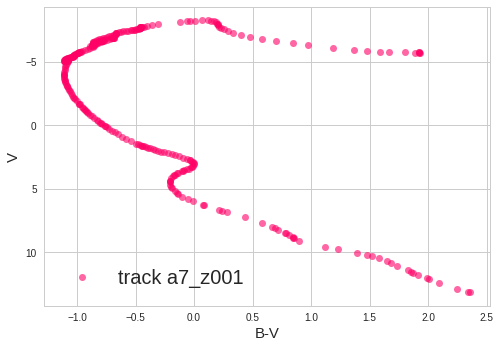

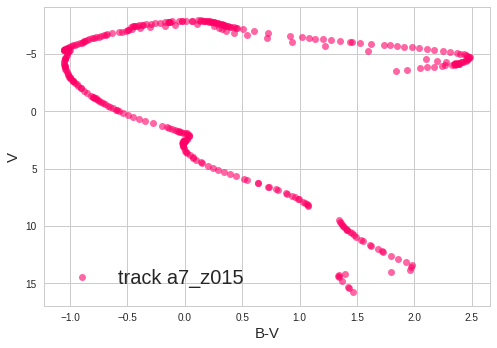

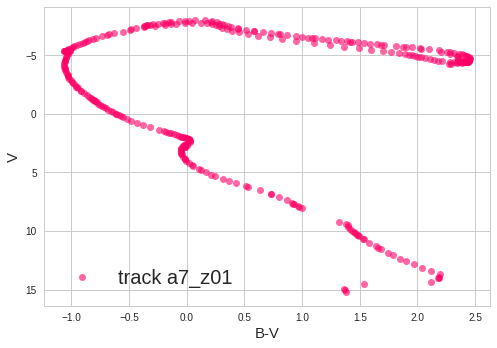

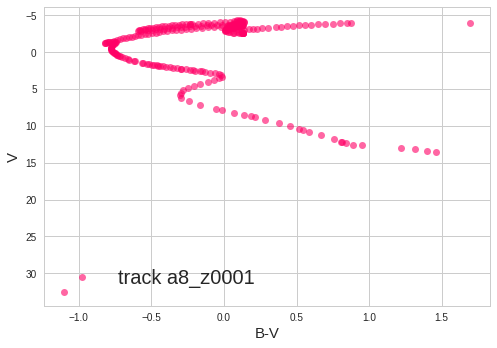

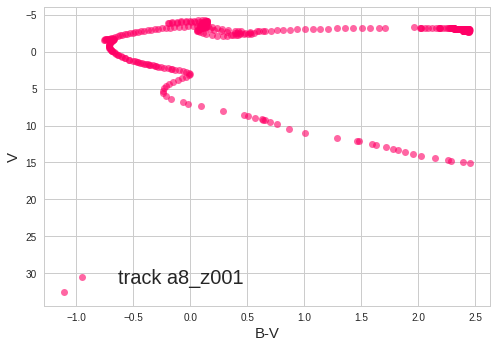

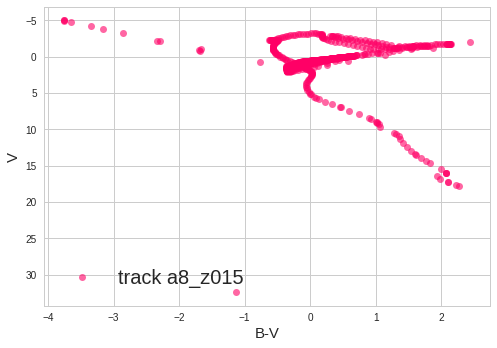

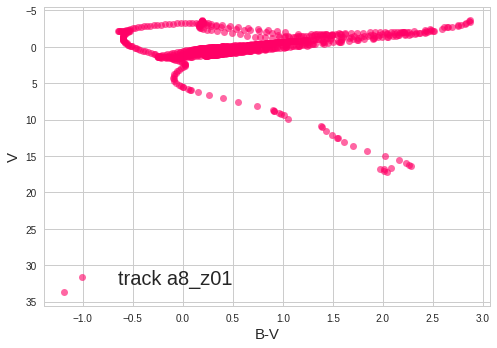

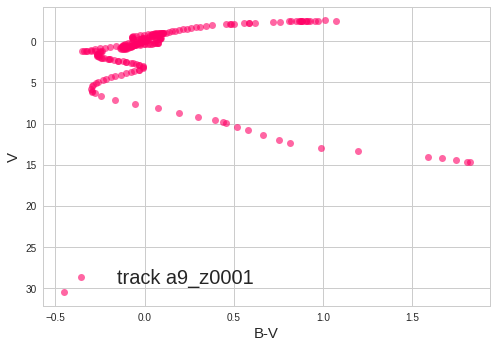

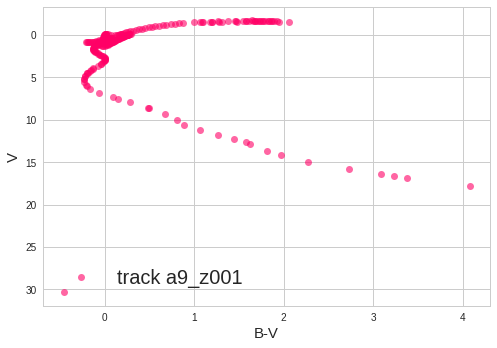

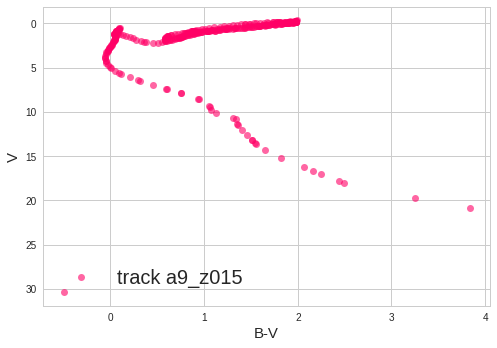

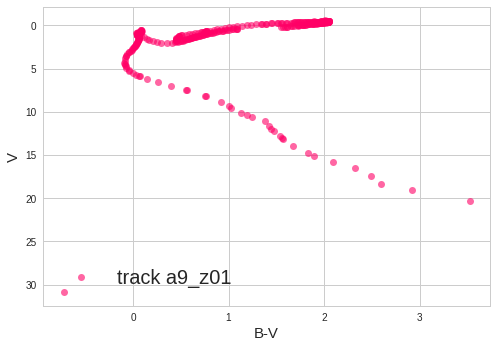

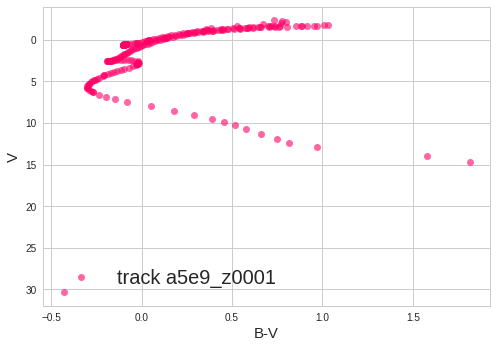

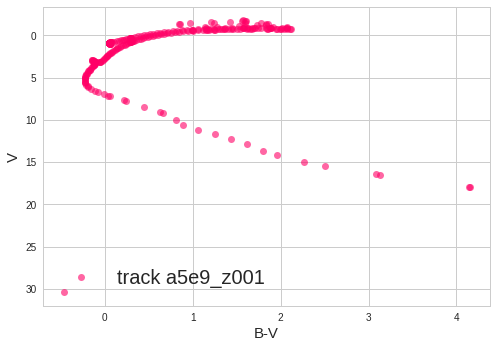

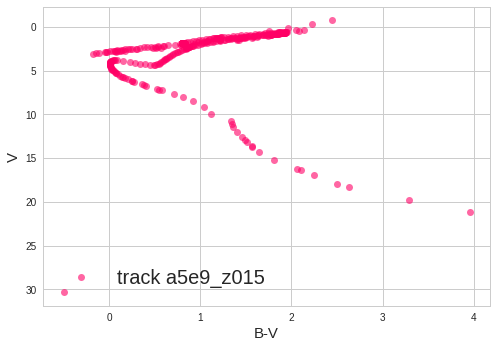

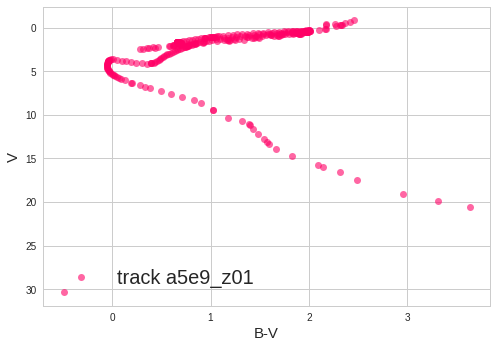

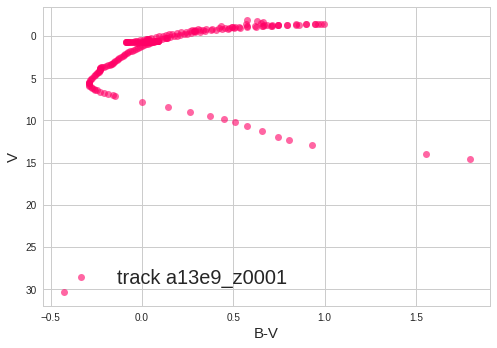

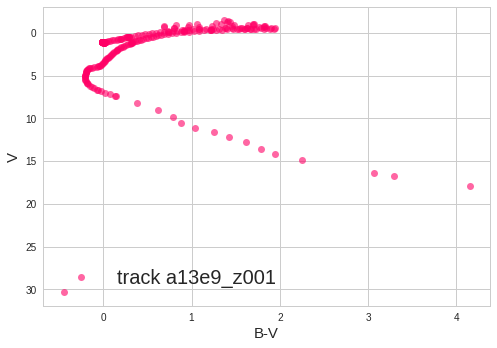

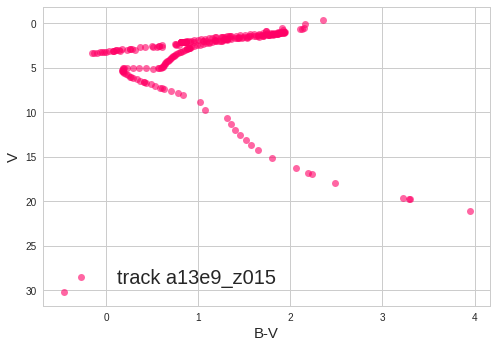

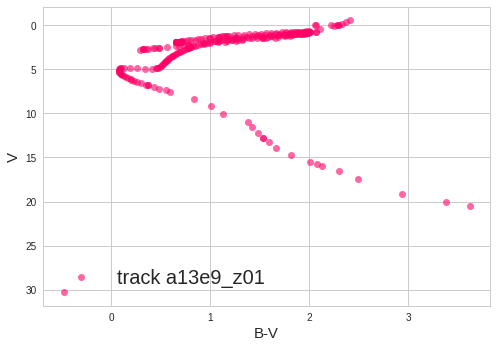

In [10]:
for k in range(len(evolutionary_tracks_files)):
    evol_track = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[k]), dtype=str)
    b_band_e   = evol_track[:,23].astype(float)
    v_band_e   = evol_track[:,24].astype(float)
    bv_color_e = b_band_e-v_band_e
    
    current_track = np.array(evolutionary_tracks_files)[k]
    current_track = current_track.split('.')[0]
    
    new_bv_color_e = []
    new_v_band_e = []
    for each_color in range(bv_color_e.size):
        if bv_color_e[each_color] > 10:
            continue
        else:
            new_bv_color_e.append(bv_color_e[each_color])
            new_v_band_e.append(v_band_e[each_color])
    new_bv_color_e = np.array(new_bv_color_e)
    new_v_band_e = np.array(new_v_band_e)
              
    plt.plot(new_bv_color_e, new_v_band_e, 'o', color='#ff0066', alpha=0.6, label='track %s' % current_track)
    plt.ylabel('V', fontsize=15)
    plt.xlabel('B-V', fontsize=15)
    plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
    plt.minorticks_on()
    plt.gca().invert_yaxis()
    plt.show()

In [11]:
# for c in range(clusters.size):
#     cluster_c  = np.loadtxt(os.path.join(clusters_path, clusters[c]), dtype=float)
#     v_band_c   = cluster[:,0].astype(float)
#     bv_color_c = cluster[:,1].astype(float)
    
#     print('%15s' % 'Current Cluster', '%15s' % 'Current Track', '%15s' % 'avg[Distance(B-V)s]')
    
#     clust     = []
#     track     = []
#     distances = []
#     for e in range(len(evolutionary_tracks_files)):
#         current_track = np.array(evolutionary_tracks_files)[e]
#         current_track = current_track.split('.')[0]
#         evol_track = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[e]), dtype=str)
#         b_band_e   = evol_track[:,23].astype(float)
#         v_band_e   = evol_track[:,24].astype(float)
#         bv_color_e = b_band_e-v_band_e
        
#         distance = []
#         for j in range(bv_color_c.size):
#             closest_index  = np.abs(v_band_c[j]-v_band_e).argmin()
#             distance_i = bv_color_c[j]-bv_color_e[closest_index]
#             distance.append(distance_i)
#         distance = np.array(distance)
#         avg_distance = np.average(distance)
        
#         distances.append(np.abs(avg_distance))
#         clust.append(clusters[c].split('.')[0])
#         track.append(current_track)
#         print('%15s' % clusters[c].split('.')[0], '%15s' % current_track, '%15f' % avg_distance)

#     distances = np.array(distances)
#     clust = np.array(clust)
#     track = np.array(track)
    
#     current_dataframe = np.column_stack((clust, track, distances))
    
    
#     print ('----------------------------------------------------------------------------------------')
#     print ('----------------------------------------------------------------------------------------')
    
#     print current_dataframe[np.where(np.amin(distances))]
# #     print('%15s' % 'Cluster', '%15s' % 'Track', '%15s' % 'closest distance')
    
# #     print('%15s' % clust[[distances.min()]], '%15s' % track[[distances.min()]], '%15f' % distances[[distances.min()]])
    
#     print ('----------------------------------------------------------------------------------------')
#     print ('----------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
cluster_01


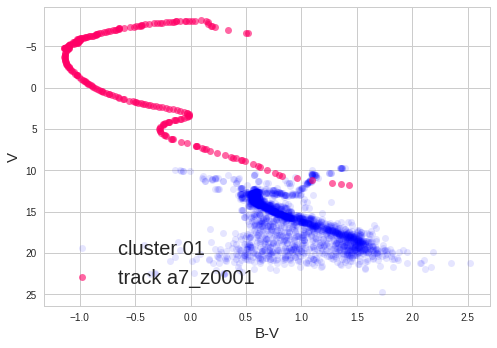

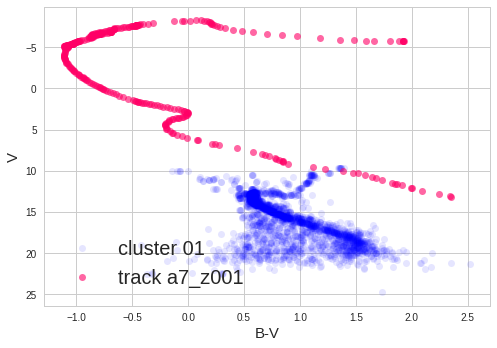

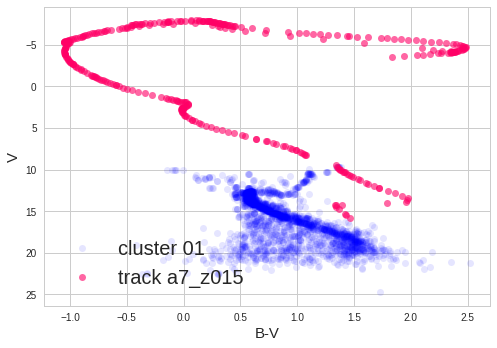

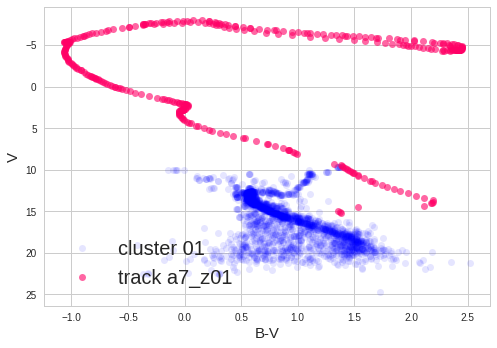

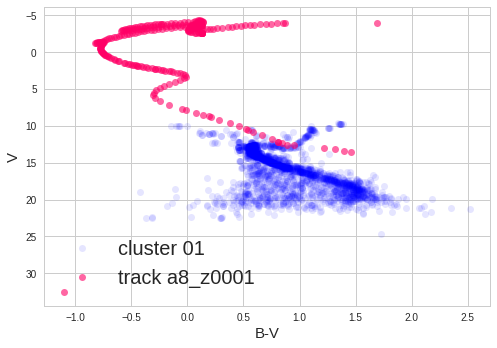

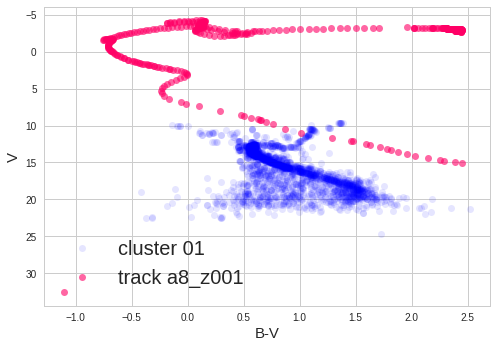

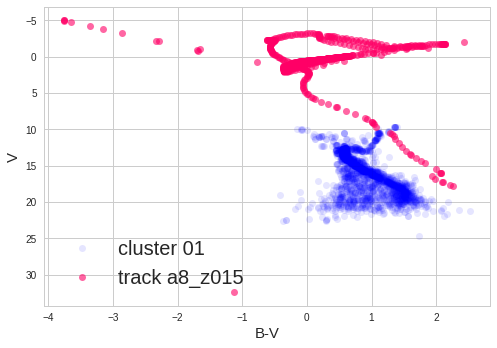

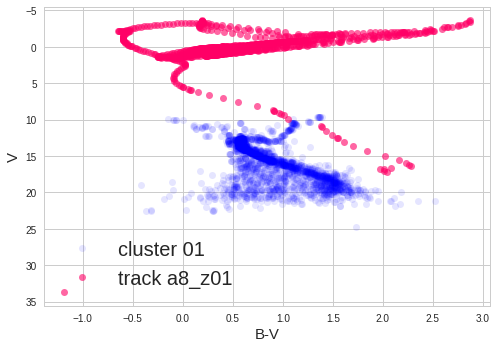

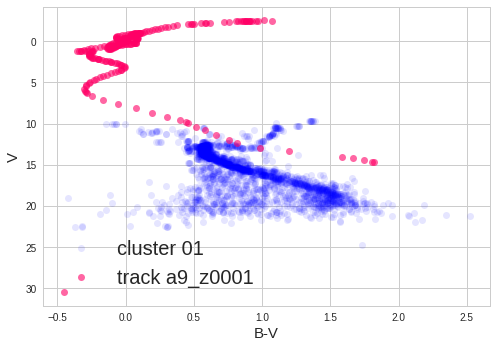

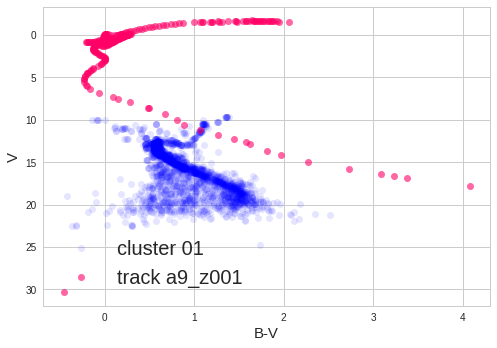

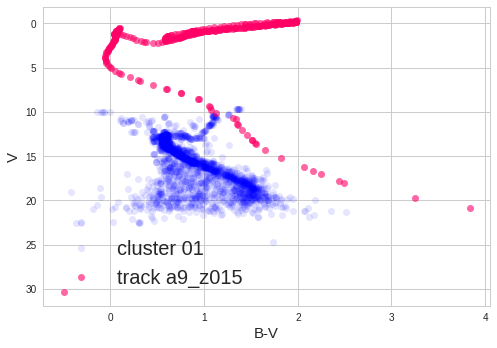

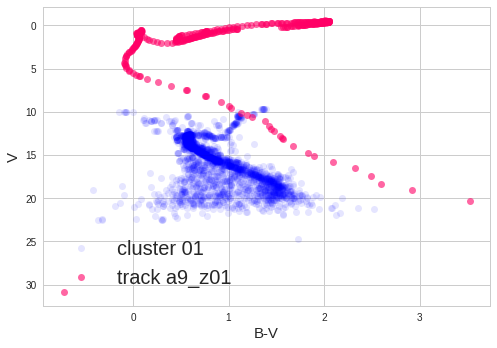

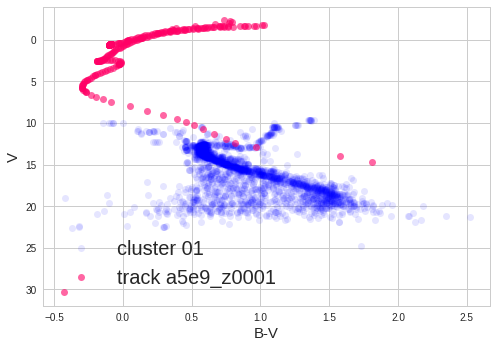

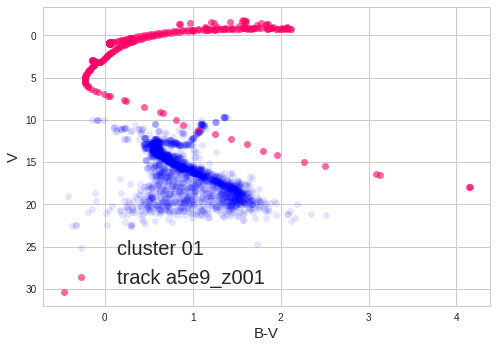

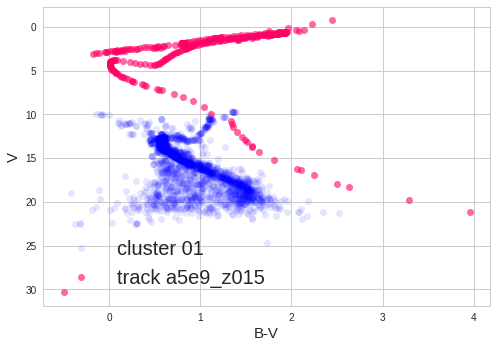

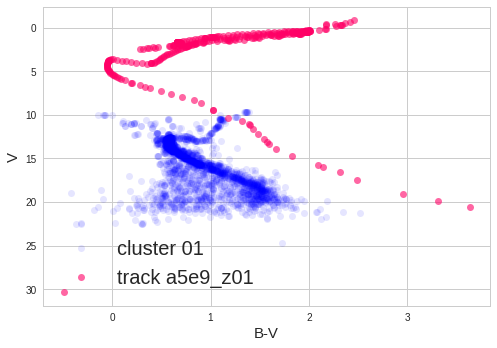

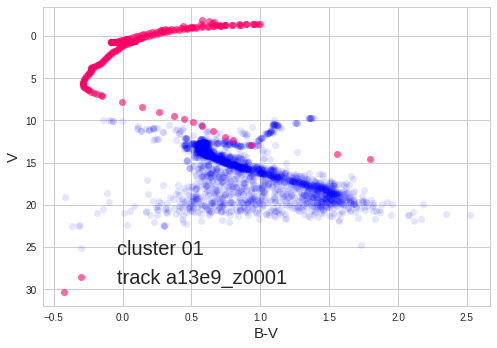

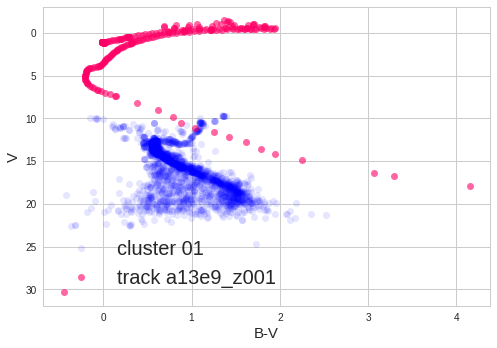

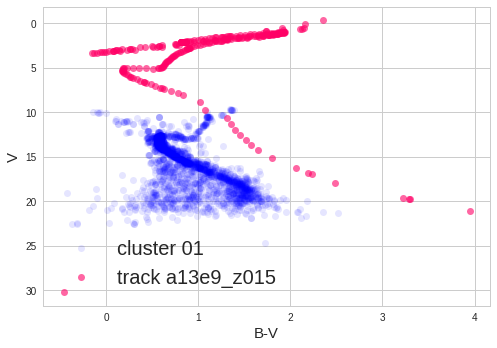

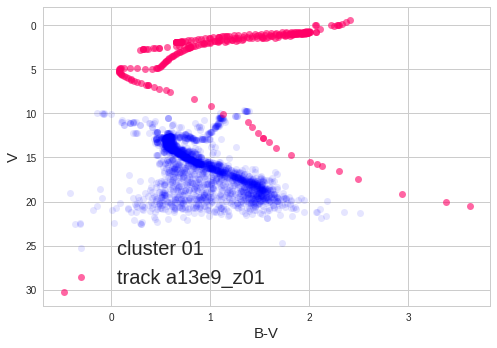

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
cluster_02


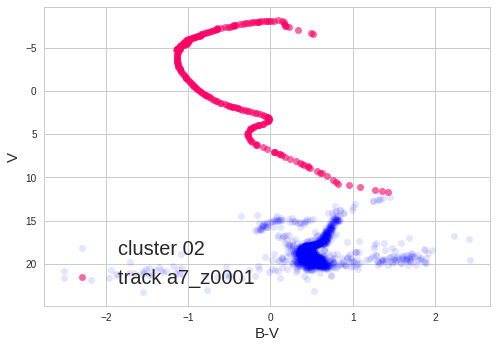

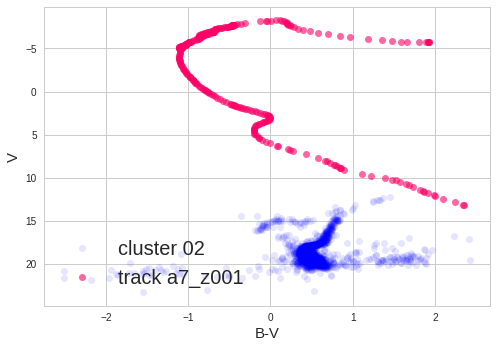

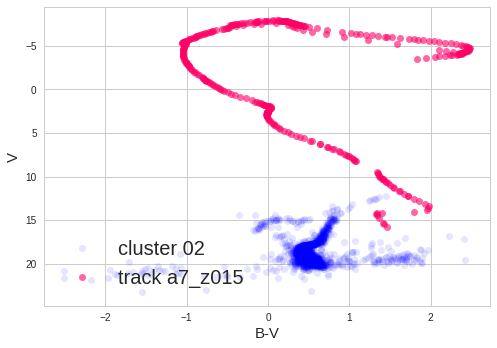

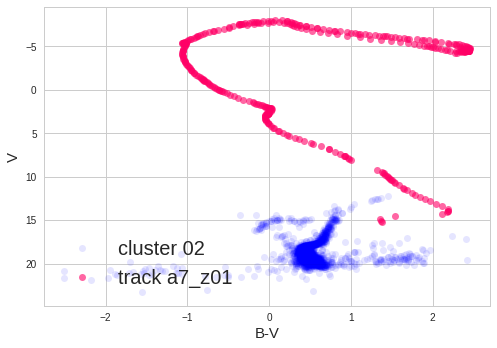

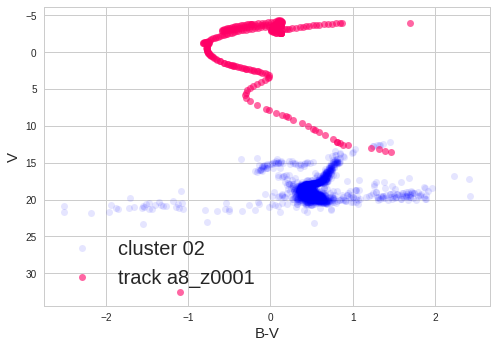

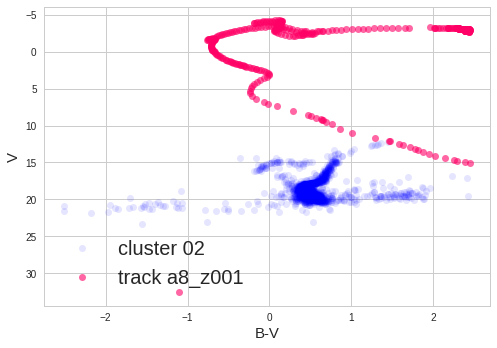

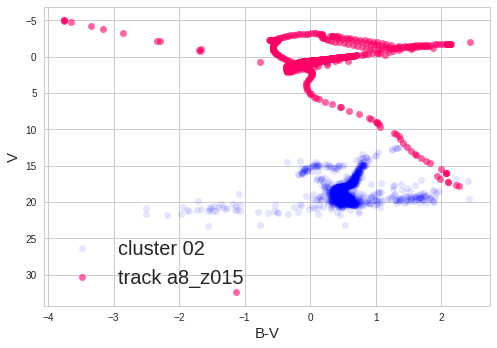

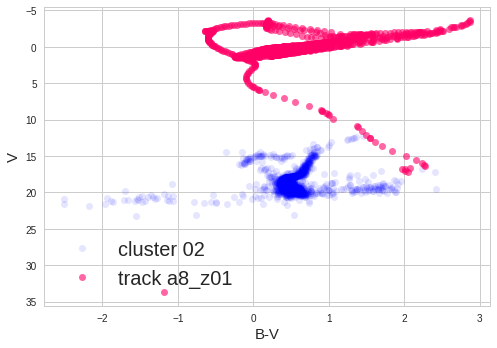

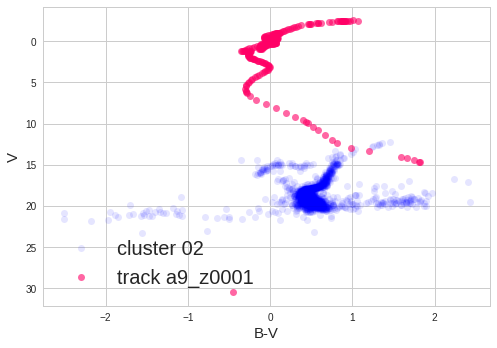

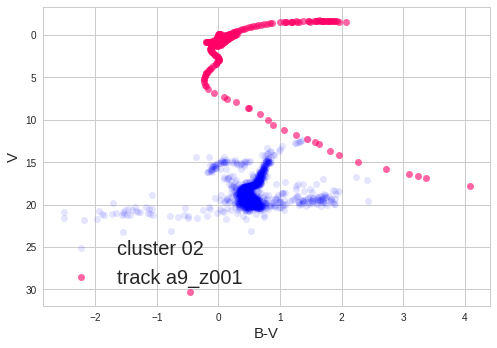

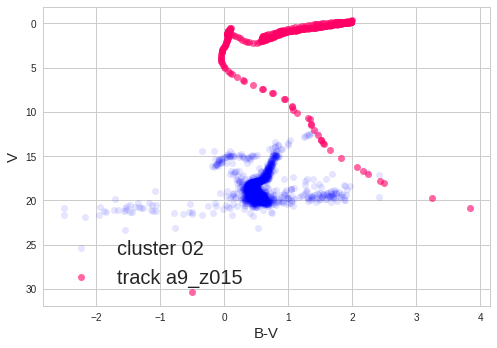

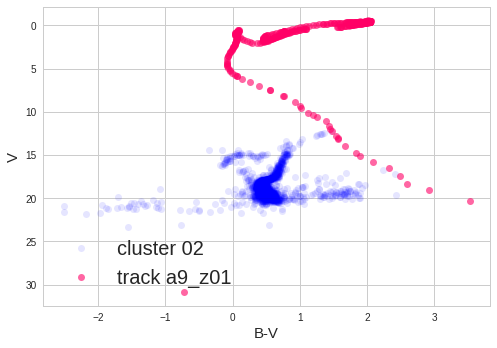

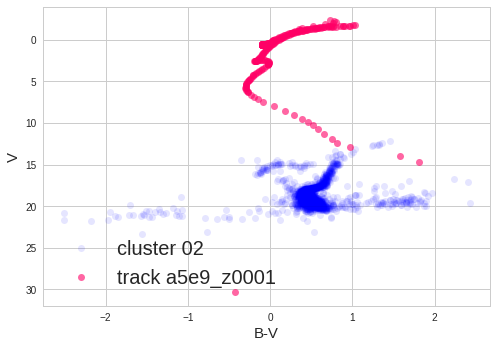

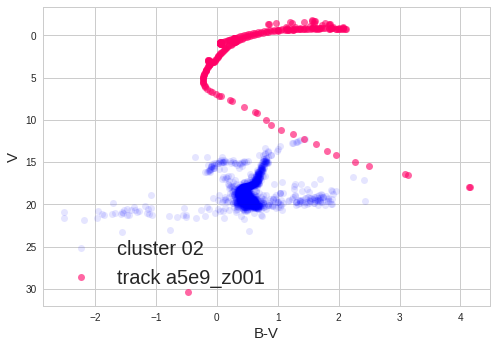

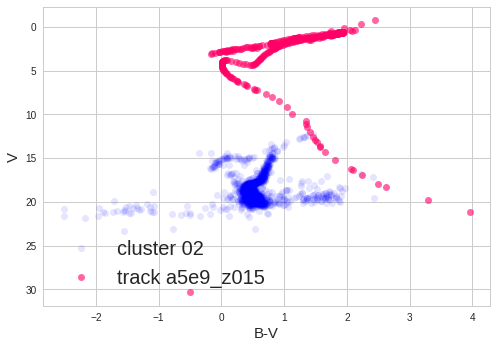

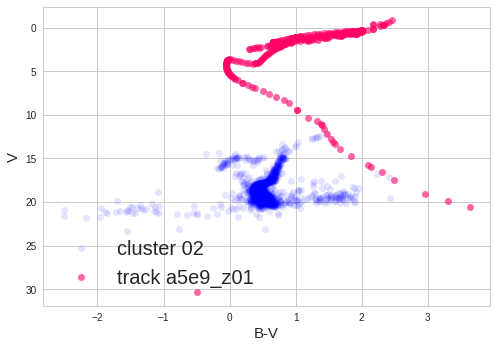

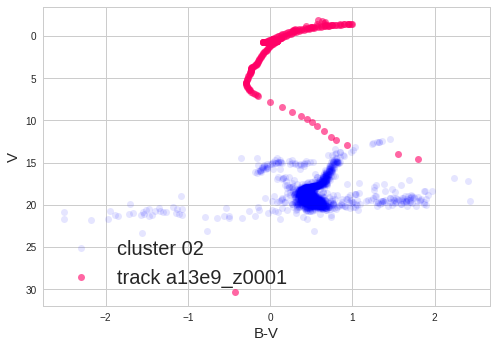

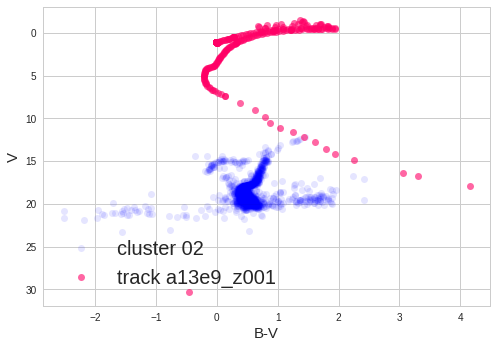

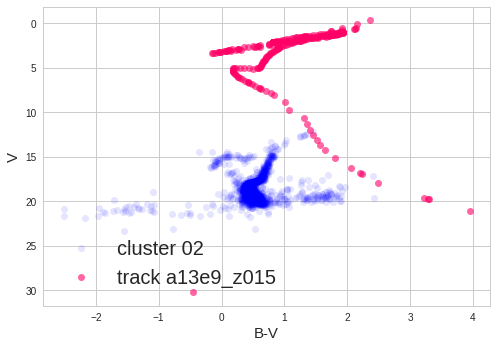

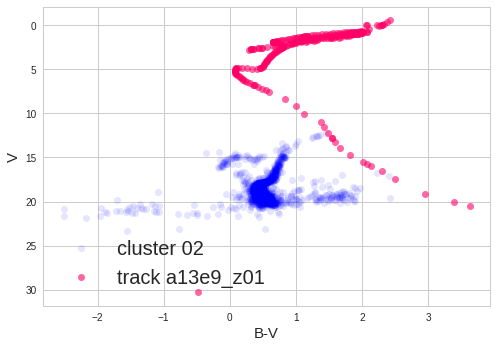

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
cluster_03


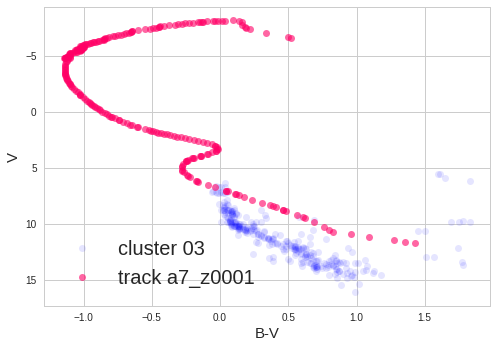

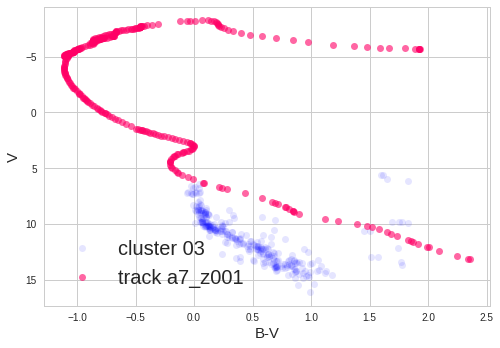

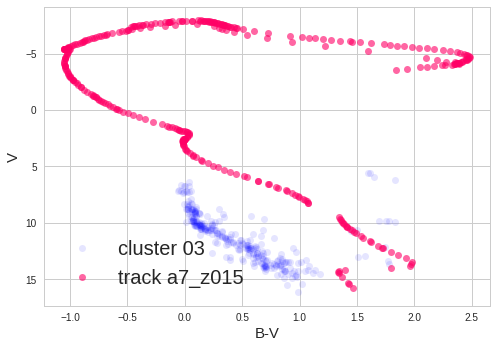

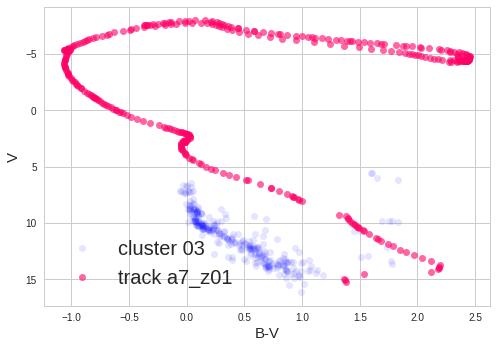

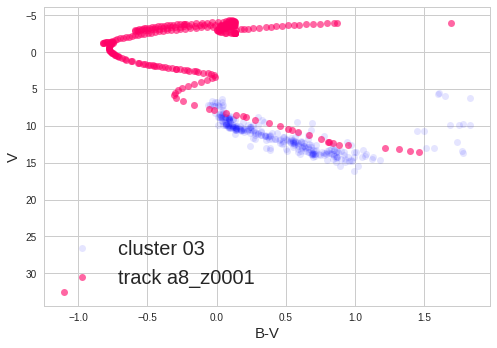

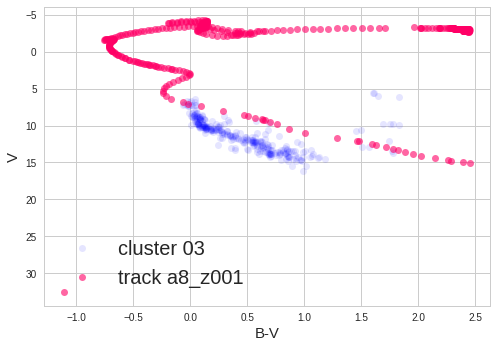

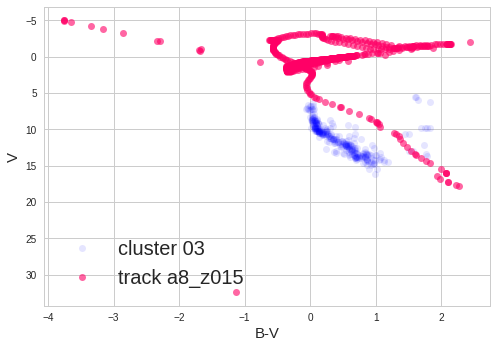

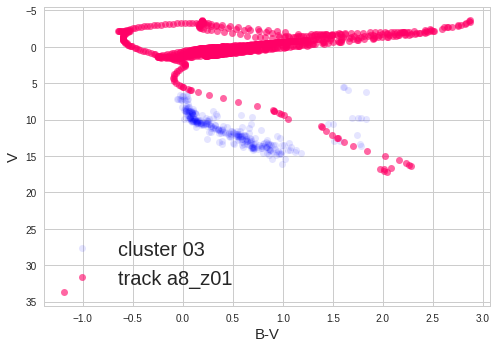

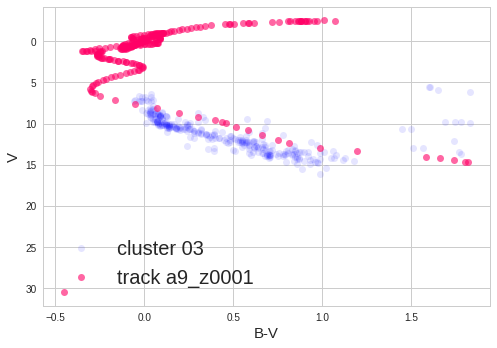

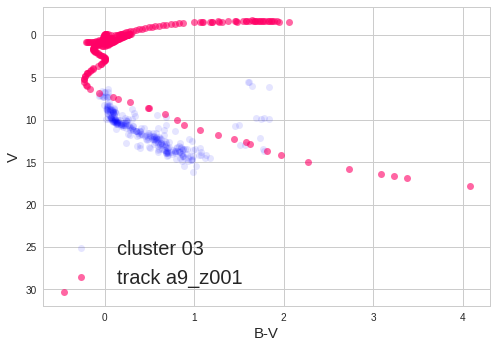

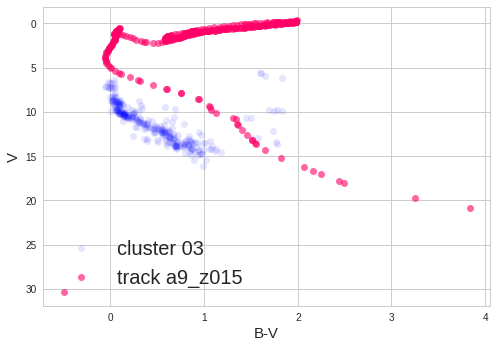

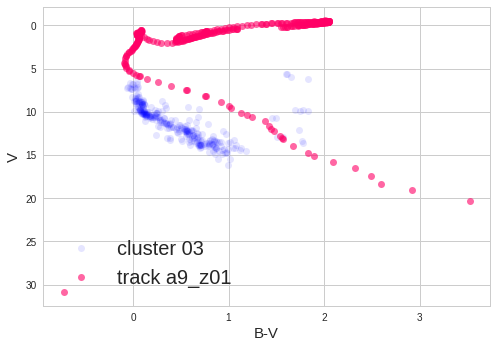

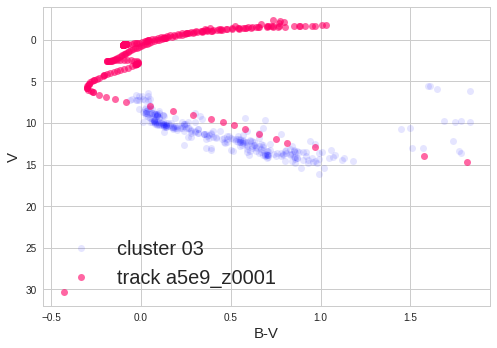

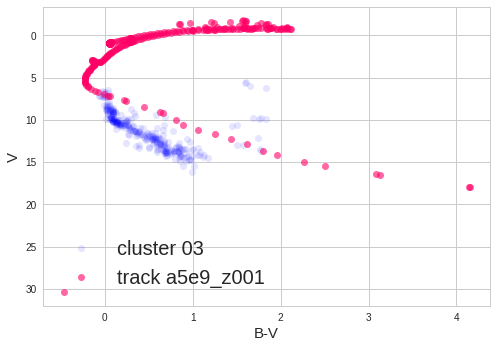

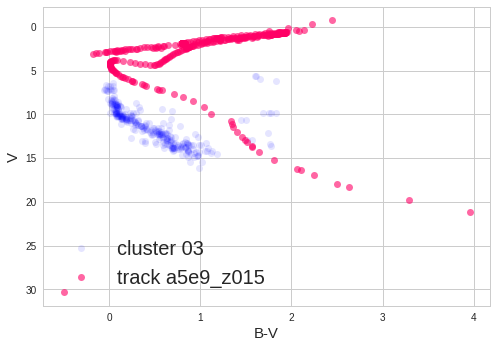

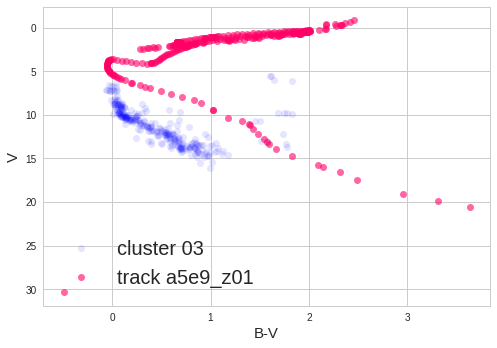

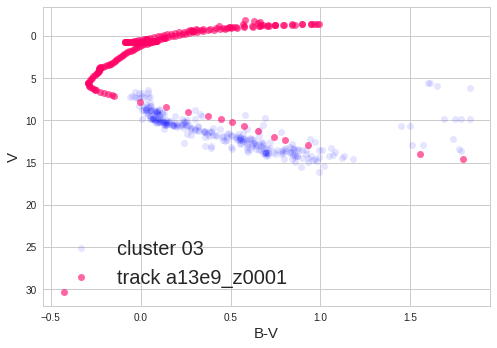

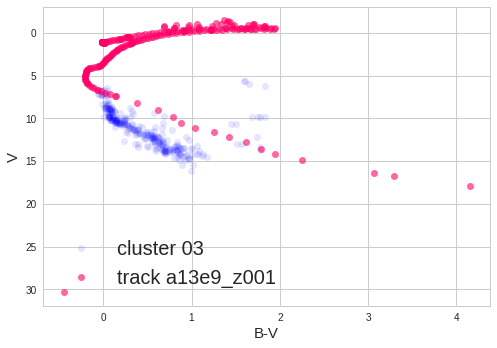

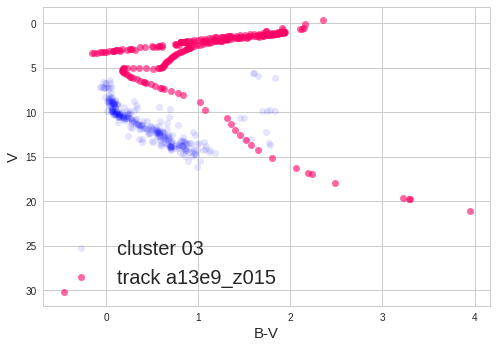

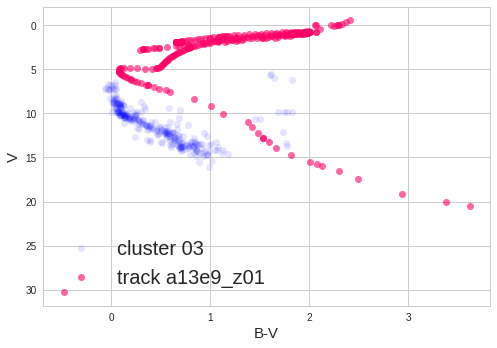

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
cluster_04


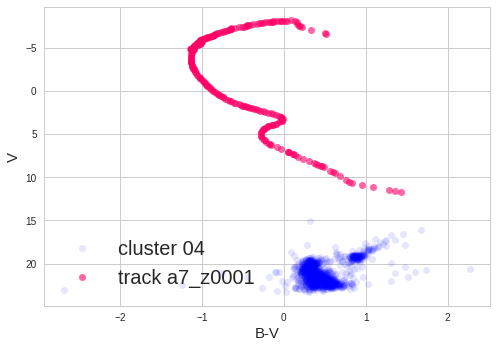

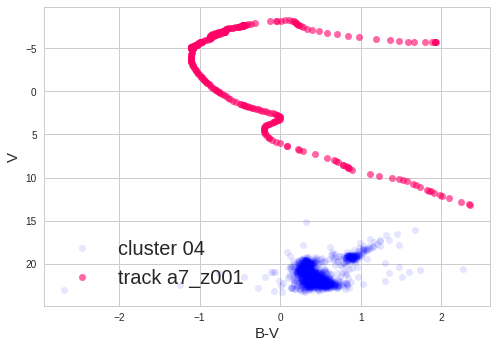

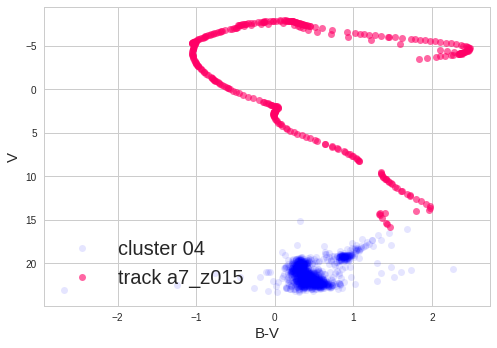

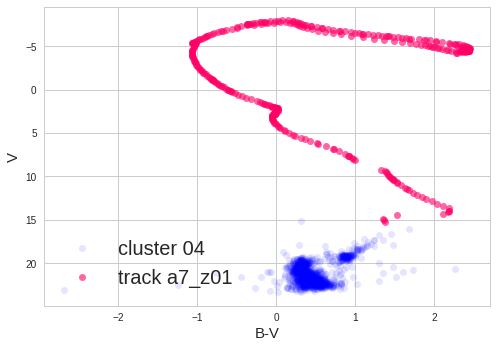

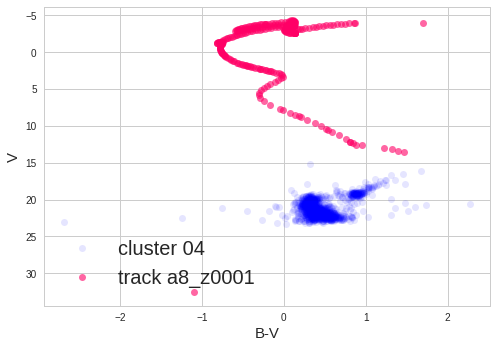

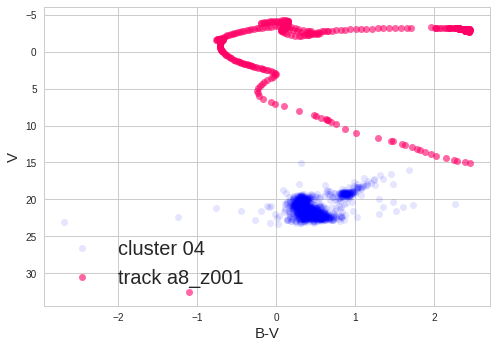

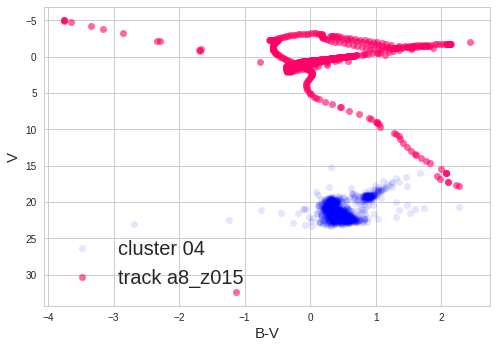

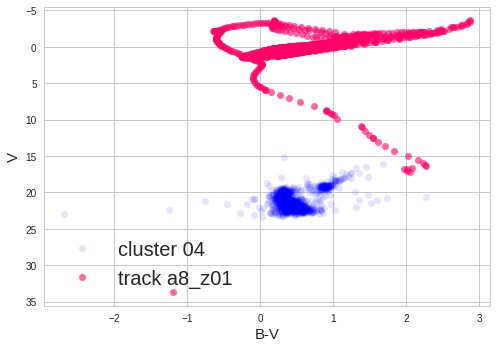

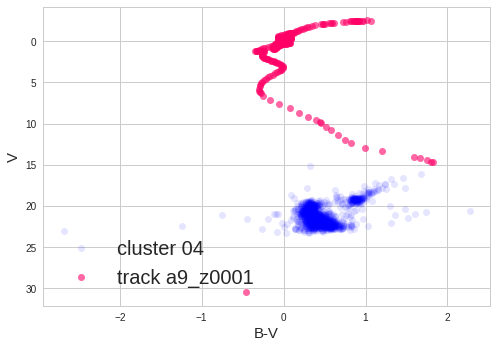

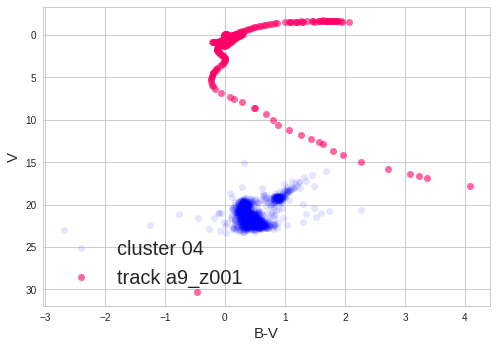

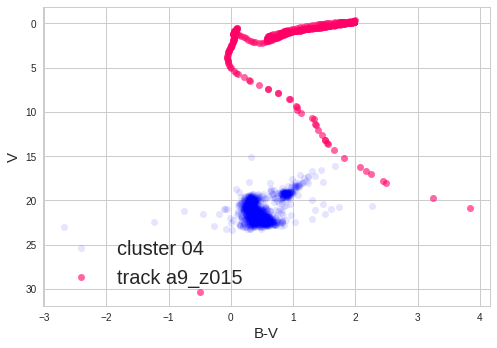

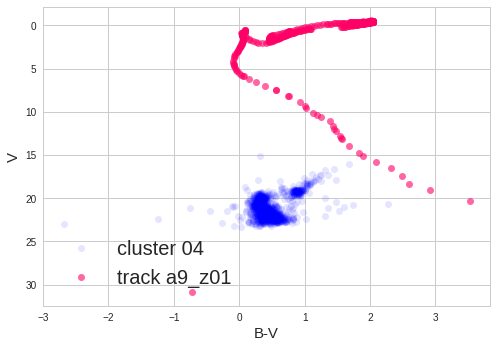

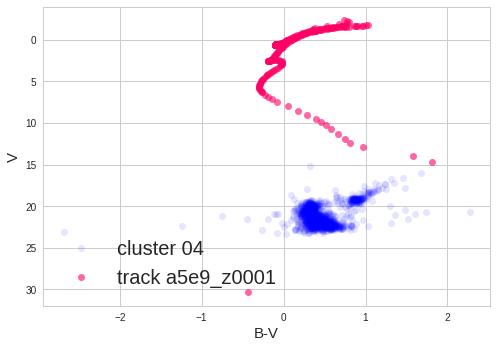

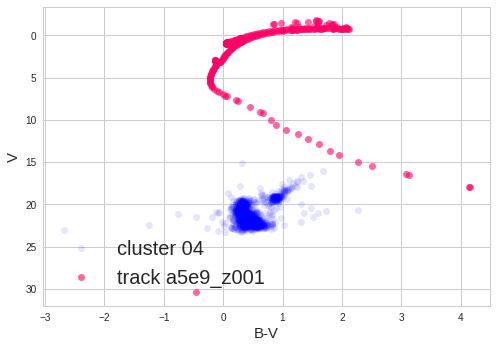

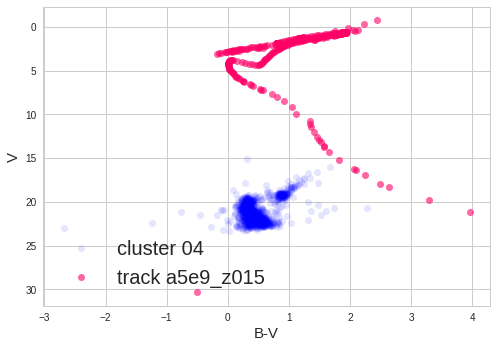

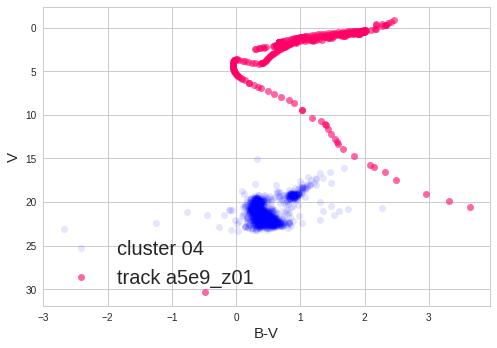

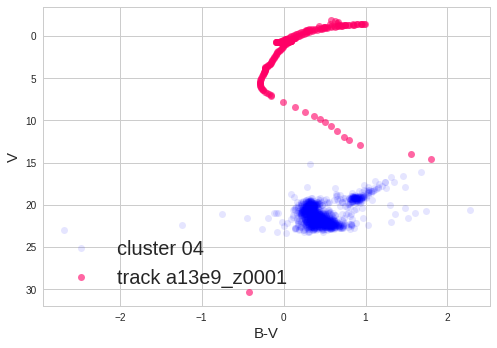

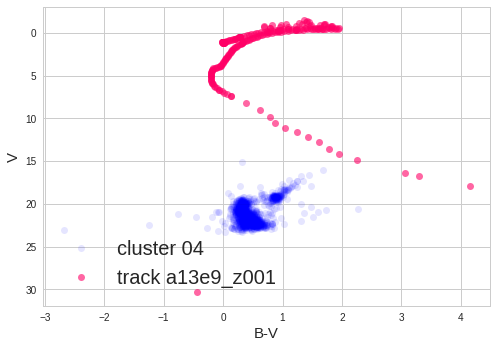

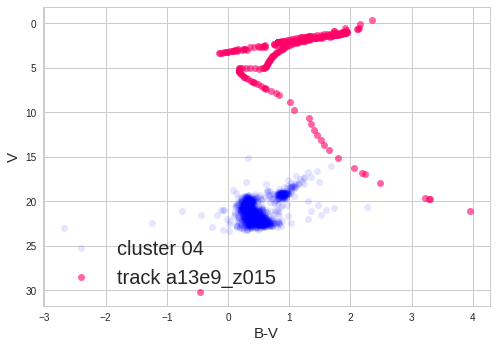

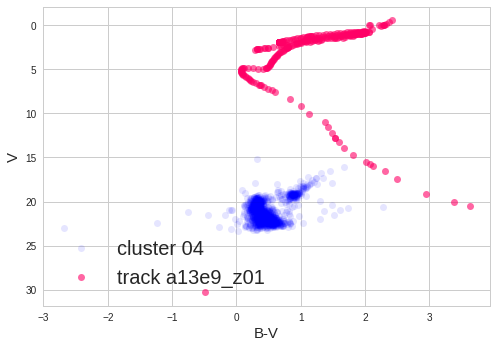

In [12]:
for i in range(clusters.size):
    cluster  = np.loadtxt(os.path.join(clusters_path, clusters[i]), dtype=float)
    v_band   = cluster[:,0].astype(float)
    bv_color = cluster[:,1].astype(float)
    
    index = [(v_band<26) * (bv_color>-5)]

    print ('----------------------------------------------------------------------------------------')
    print ('----------------------------------------------------------------------------------------')
    print (clusters[i].split('.')[0])
              
    for k in range(len(evolutionary_tracks_files)):
        evol_track = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[k]), dtype=str)
        b_band_e   = evol_track[:,23].astype(float)
        v_band_e   = evol_track[:,24].astype(float)
        bv_color_e = b_band_e-v_band_e
    
        current_track = np.array(evolutionary_tracks_files)[k]
        current_track = current_track.split('.')[0]
    
        new_bv_color_e = []
        new_v_band_e = []
        for each_color in range(bv_color_e.size):
            if bv_color_e[each_color] > 10:
                continue
            else:
                new_bv_color_e.append(bv_color_e[each_color])
                new_v_band_e.append(v_band_e[each_color])
        new_bv_color_e = np.array(new_bv_color_e)
        new_v_band_e = np.array(new_v_band_e)
    
        plt.plot(bv_color[index], v_band[index], 'o', color='blue', alpha=0.1, label='cluster %s' % clusters[i][8:10])
        plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
        plt.plot(new_bv_color_e, new_v_band_e, 'o', color='#ff0066', alpha=0.6, label='track %s' % current_track)
        plt.ylabel('V', fontsize=15)
        plt.xlabel('B-V', fontsize=15)
        plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
        plt.minorticks_on()
        plt.gca().invert_yaxis()
        plt.show()

In [13]:
# for i in range(clusters.size):
#     cluster  = np.loadtxt(os.path.join(clusters_path, clusters[i]), dtype=float)
#     v_band   = cluster[:,0].astype(float)
#     bv_color = cluster[:,1].astype(float)
    
#     index = [(v_band<26) * (bv_color>-5)]
    
#     bv_average, bv_std, bv_color_std = standardization(bv_color[index])
#     v_average, v_std, v_band_std     = standardization(v_band[index])

#     print ('----------------------------------------------------------------------------------------')
#     print ('----------------------------------------------------------------------------------------')
#     print (clusters[i].split('.')[0])
              
#     for k in range(len(evolutionary_tracks_files)):
#         evol_track = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[k]), dtype=str)
#         b_band_e   = evol_track[:,23].astype(float)
#         v_band_e   = evol_track[:,24].astype(float)
#         bv_color_e = b_band_e-v_band_e
    
#         current_track = np.array(evolutionary_tracks_files)[k]
#         current_track = current_track.split('.')[0]
    
#         new_bv_color_e = []
#         new_v_band_e = []
#         for each_color in range(bv_color_e.size):
#             if bv_color_e[each_color] > 10:
#                 continue
#             else:
#                 new_bv_color_e.append(bv_color_e[each_color])
#                 new_v_band_e.append(v_band_e[each_color])
#         new_bv_color_e = np.array(new_bv_color_e)
#         new_v_band_e = np.array(new_v_band_e)
        
#         theoretical_bv_average, theoretical_bv_std, theoretical_bv_color = standardization(new_bv_color_e)
#         theoretical_v_average, theoretical_v_std, theoretical_v_band     = standardization(new_v_band_e)
    
#         plt.plot(bv_color_std, v_band_std, 'o', color='blue', alpha=0.1, label='cluster %s' % clusters[i][8:10])
#         plt.plot(theoretical_bv_color, theoretical_v_band, 'o', color='#ff0066', alpha=0.6, label='track %s' % current_track)
#         plt.ylabel('V', fontsize=15)
#         plt.xlabel('B-V', fontsize=15)
#         plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
#         plt.minorticks_on()
#         plt.gca().invert_yaxis()
#         plt.show()
        
# #         print('%15s' % 'Theo_Aver_BV', '%15s' % 'Theo_STD_BV', '%15s' % 'Obs_Aver_BV', '%15s' % 'Obs_STD_BV')
# #         print('%15s' % theoretical_bv_average, '%15s' % 'Theo_STD', '%15s' % 'Obs_Aver', '%15s' % 'Obs_STD')
        

In [14]:
# for i in range(clusters.size):
#     cluster  = np.loadtxt(os.path.join(clusters_path, clusters[i]), dtype=float)
#     v_band   = cluster[:,0].astype(float)
#     bv_color = cluster[:,1].astype(float)
    
#     index = [(v_band<26) * (bv_color>-5)]
    
#     print ('----------------------------------------------------------------------------------------')
#     print ('----------------------------------------------------------------------------------------')
#     print (clusters[i].split('.')[0])
              
#     for k in range(len(evolutionary_tracks_files)):
#         evol_track = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[k]), dtype=str)
#         b_band_e   = evol_track[:,23].astype(float)
#         v_band_e   = evol_track[:,24].astype(float)
#         bv_color_e = b_band_e-v_band_e
    
#         current_track = np.array(evolutionary_tracks_files)[k]
#         current_track = current_track.split('.')[0]
    
#         new_bv_color_e = []
#         new_v_band_e = []
#         for each_color in range(bv_color_e.size):
#             if bv_color_e[each_color] > 10:
#                 continue
#             else:
#                 new_bv_color_e.append(bv_color_e[each_color])
#                 new_v_band_e.append(v_band_e[each_color])
#         new_bv_color_e = np.array(new_bv_color_e)
#         new_v_band_e = np.array(new_v_band_e)
        
#         theoretical_bv_average, theoretical_bv_std, theoretical_bv_color = standardization(new_bv_color_e)
#         theoretical_v_average, theoretical_v_std, theoretical_v_band     = standardization(new_v_band_e)
        
#         observational_bv_color = (bv_color - theoretical_bv_average)/theoretical_bv_std
#         observational_v_band   = (v_band - theoretical_v_average)/theoretical_v_std
           
    
#         plt.plot(observational_bv_color, observational_v_band, 'o', color='blue', alpha=0.1, label='cluster %s' % clusters[i][8:10])
#         plt.plot(theoretical_bv_color, theoretical_v_band, 'o', color='#ff0066', alpha=0.6, label='track %s' % current_track)
#         plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
#         plt.ylabel('V', fontsize=15)
#         plt.xlabel('B-V', fontsize=15)
#         plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
#         plt.minorticks_on()
#         plt.gca().invert_yaxis()
#         plt.show()

# Visual inspections shows that...

##### Cluster 01 ~ track a13e9_z015
##### Cluster 02 ~ track a7_z0001
##### Cluster 03 ~  track a9_z015
##### Cluster 04 ~ track a13e9_z01 or z_015

# Checking out each cluster

## Cluster 01
Supposed age: $13 \cdot 10^9$ yr

Supposed metallicity: 0.15 ($Z_{\odot}$)

Old open cluster?

In [15]:
print evolutionary_tracks_files

['a7_z0001.dat', 'a7_z001.dat', 'a7_z015.dat', 'a7_z01.dat', 'a8_z0001.dat', 'a8_z001.dat', 'a8_z015.dat', 'a8_z01.dat', 'a9_z0001.dat', 'a9_z001.dat', 'a9_z015.dat', 'a9_z01.dat', 'a5e9_z0001.dat', 'a5e9_z001.dat', 'a5e9_z015.dat', 'a5e9_z01.dat', 'a13e9_z0001.dat', 'a13e9_z001.dat', 'a13e9_z015.dat', 'a13e9_z01.dat']


In [16]:
print evolutionary_tracks_files[-2]

a13e9_z015.dat


In [17]:
cluster      = np.loadtxt(os.path.join(clusters_path, cluster01), dtype=float)
obs_v_band   = cluster[:,0].astype(float)
obs_bv_color = cluster[:,1].astype(float)

In [18]:
evol_track   = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[-2]), dtype=str)
the_b_band   = evol_track[:,23].astype(float)
the_v_band   = evol_track[:,24].astype(float)
the_bv_color = the_b_band-the_v_band

In [19]:
correction01x = -0.35      # color excess E(B-V)
correction01y = -7.7       # (m-M)_0

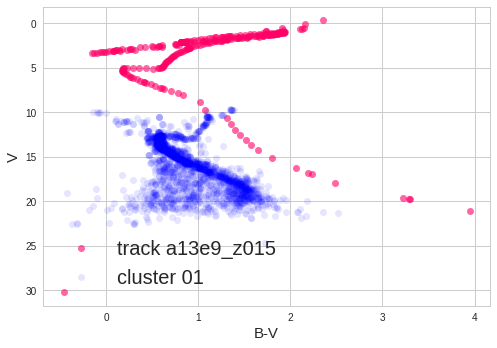

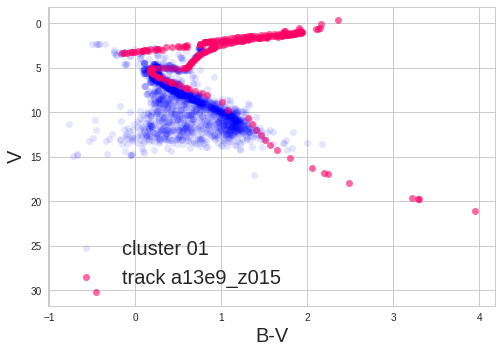

In [20]:
plt.plot(the_bv_color, the_v_band, 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[-2].split('.')[0])
plt.plot(obs_bv_color, obs_v_band, 'o', color='blue', alpha=0.1, label='cluster 01')
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=15)
plt.xlabel('B-V', fontsize=15)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

plt.plot(obs_bv_color+correction01x, obs_v_band+correction01y, 'o', color='blue', alpha=0.1, label='cluster 01')
plt.plot(the_bv_color, the_v_band, 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[-2].split('.')[0])
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=20)
plt.xlabel('B-V', fontsize=20)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

#### Galactic extinction ($A_V$)

In [21]:
av01 = np.abs(3.1 * correction01x)
print ("The galactic extinction is: A_V = %.2f" % av01)

The galactic extinction is: A_V = 1.08


#### Distance

In [22]:
distance01 = 10**((np.abs(correction01y)+5)/5.)
print ("The distance of the cluster 01 is: %.1f parsecs" % distance01)

The distance of the cluster 01 is: 346.7 parsecs


## Cluster 02
Supposed age: $10^7$ yr

Supposed metallicity: 0.0001 ($Z_{\odot})$

Young Open Cluster?

In [23]:
evolutionary_tracks_files[0]

'a7_z0001.dat'

In [24]:
cluster      = np.loadtxt(os.path.join(clusters_path, cluster02), dtype=float)
obs_v_band   = cluster[:,0].astype(float)
obs_bv_color = cluster[:,1].astype(float)

In [25]:
evol_track   = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[0]), dtype=str)
the_b_band   = evol_track[:,23].astype(float)
the_v_band   = evol_track[:,24].astype(float)
the_bv_color = the_b_band-the_v_band

In [26]:
correction02x = -0.7
correction02y = -13.9

In [27]:
index = [(obs_v_band<26) * (obs_bv_color>-2)]

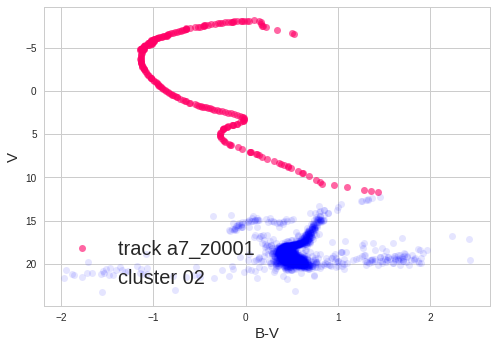

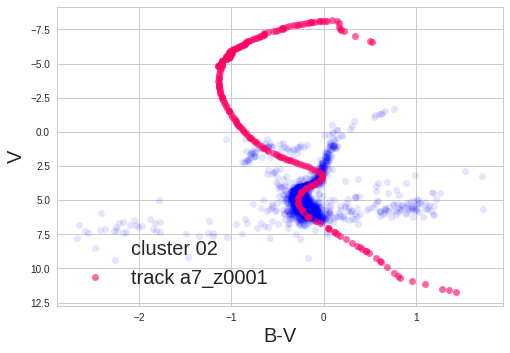

In [28]:
plt.plot(the_bv_color, the_v_band, 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[0].split('.')[0])
plt.plot(obs_bv_color[index], obs_v_band[index], 'o', color='blue', alpha=0.1, label='cluster 02')
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=15)
plt.xlabel('B-V', fontsize=15)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

plt.plot(obs_bv_color[index]+correction02x, obs_v_band[index]+correction02y, 'o', color='blue', alpha=0.1, label='cluster 02')
plt.plot(the_bv_color, the_v_band, 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[0].split('.')[0])
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=20)
plt.xlabel('B-V', fontsize=20)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

#### Galactic extinction ($A_V$)

In [29]:
av02 = np.abs(3.1 * correction02x)
print ("The galactic extinction is: A_V = %.2f" % av02)

The galactic extinction is: A_V = 2.17


#### Distance

In [30]:
distance02 = 10**((np.abs(correction02y)+5)/5.)
print ("The distance of the cluster 02 is: %.1f parsecs" % distance02)

The distance of the cluster 02 is: 6025.6 parsecs


## Cluster 03
Supposed age: $10^9$ yr

Supposed metallicity: 0.015 ($Z_{\odot}$) or 0.01

LMC Stellar Cluster?

In [31]:
print evolutionary_tracks_files[10]

a9_z015.dat


In [32]:
cluster      = np.loadtxt(os.path.join(clusters_path, cluster03), dtype=float)
obs_v_band   = cluster[:,0].astype(float)
obs_bv_color = cluster[:,1].astype(float)

In [33]:
evol_track   = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[10]), dtype=str)
the_b_band   = evol_track[:,23].astype(float)
the_v_band   = evol_track[:,24].astype(float)
the_bv_color = the_b_band-the_v_band

In [34]:
correction03x = -0.1
correction03y = -5

In [35]:
index = [(obs_v_band<26) * (obs_bv_color>-2)]
index_theo = [(the_bv_color < 5)]

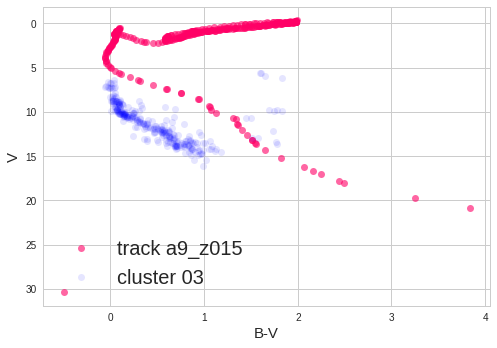

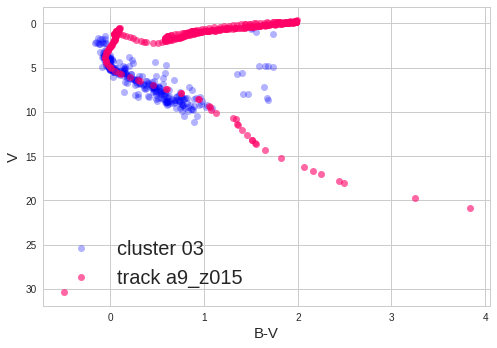

In [36]:
plt.plot(the_bv_color[index_theo], the_v_band[index_theo], 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[10].split('.')[0])
plt.plot(obs_bv_color[index], obs_v_band[index], 'o', color='blue', alpha=0.1, label='cluster 03')
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=15)
plt.xlabel('B-V', fontsize=15)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

plt.plot(obs_bv_color[index]+correction03x, obs_v_band[index]+correction03y, 'o', color='blue', alpha=0.3, label='cluster 03')
plt.plot(the_bv_color[index_theo], the_v_band[index_theo], 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[10].split('.')[0])
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=15)
plt.xlabel('B-V', fontsize=15)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

#### Galactic extinction ($A_V$)

In [37]:
av03 = np.abs(3.1 * correction03x)
print ("The galactic extinction is: A_V = %.2f" % av03)

The galactic extinction is: A_V = 0.31


#### Distance

In [38]:
distance03 = 10**((np.abs(correction03y)+5)/5.)
print ("The distance of the cluster 03 is: %.1f parsecs" % distance03)

The distance of the cluster 03 is: 100.0 parsecs


## Cluster 04
Supposed age: $13 \cdot 10^9$ yr

Supposed metallicity: 0.015 ($Z_{\odot}$)

Halo Globular Cluster?

In [39]:
print evolutionary_tracks_files[-2]

a13e9_z015.dat


In [40]:
cluster      = np.loadtxt(os.path.join(clusters_path, cluster04), dtype=float)
obs_v_band   = cluster[:,0].astype(float)
obs_bv_color = cluster[:,1].astype(float)

In [41]:
evol_track   = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[-2]), dtype=str)
the_b_band   = evol_track[:,23].astype(float)
the_v_band   = evol_track[:,24].astype(float)
the_bv_color = the_b_band-the_v_band

In [42]:
correction04x = -0.2
correction04y = -15

In [43]:
index = [(obs_v_band<26) * (obs_bv_color>-2)]
index_theo = [(the_bv_color < 5)]

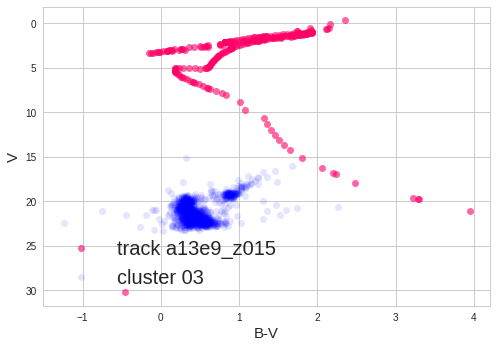

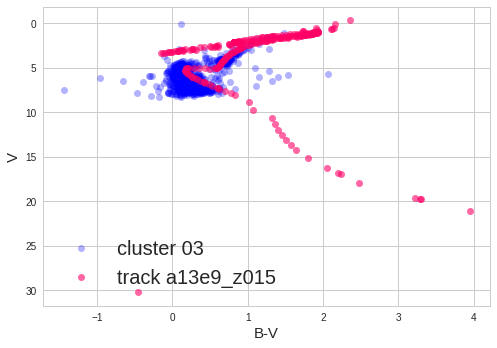

In [44]:
plt.plot(the_bv_color[index_theo], the_v_band[index_theo], 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[-2].split('.')[0])
plt.plot(obs_bv_color[index], obs_v_band[index], 'o', color='blue', alpha=0.1, label='cluster 03')
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=15)
plt.xlabel('B-V', fontsize=15)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

plt.plot(obs_bv_color[index]+correction04x, obs_v_band[index]+correction04y, 'o', color='blue', alpha=0.3, label='cluster 03')
plt.plot(the_bv_color[index_theo], the_v_band[index_theo], 'o', color='#ff0066', alpha=0.6, label='track %s' % evolutionary_tracks_files[-2].split('.')[0])
plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
plt.ylabel('V', fontsize=15)
plt.xlabel('B-V', fontsize=15)
plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.show()

#### Galactic extinction ($A_V$)

In [45]:
av04 = np.abs(3.1 * correction04x)
print ("The galactic extinction is: A_V = %.2f" % av04)

The galactic extinction is: A_V = 0.62


#### Distance

In [46]:
distance04 = 10**((np.abs(correction04y)+5)/5.)
print ("The distance of the cluster 03 is: %.1f parsecs" % distance04)

The distance of the cluster 03 is: 10000.0 parsecs
